<a href="https://colab.research.google.com/github/pavithra64/Retail_sales_prediction/blob/main/Retail_sales_prediction_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title : RETAIL SALES PREDICTION : Predicting sales of a major store chain Rossmann

**Problem Description**

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

**Data Description**

Rossmann Stores Data.csv - historical data including Sales
store.csv - supplemental information about the stores

**Data fields**
Most of the fields are self-explanatory. The following are descriptions for those that aren't.

Id - an Id that represents a (Store, Date) duple within the test set
Store - a unique Id for each store
Sales - the turnover for any given day (this is what you are predicting)
Customers - the number of customers on a given day
Open - an indicator for whether the store was open: 0 = closed, 1 = open
StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
StoreType - differentiates between 4 different store models: a, b, c, d
Assortment - describes an assortment level: a = basic, b = extra, c = extended
CompetitionDistance - distance in meters to the nearest competitor store
CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

Promo - indicates whether a store is running a promo on that day
Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

# Importing Necessary Libraries

In [ ]:
# Libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**LOADING THE DATA**

In [ ]:
store='/content/store.csv'
store=pd.read_csv(store)

In [ ]:
rsd='/content/Rossmann Stores Dataa.csv'
ross_data=pd.read_csv(rsd)

# Exploratory Data Analysis
We have two datasets - 'ross_data' and 'store'. Let's try and understand the basics of these two datasets one by one.

**Data Collection and Preprocessing**

In [ ]:
ross_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
# No. of rows and columns of ross_data
print('Shape of ross_data is', ross_data.shape)
print('No. of rows in ross_data are', ross_data.shape[0])
print('No. of columns in ross_data are', ross_data.shape[1])

Shape of ross_data is (1017209, 9)
No. of rows in ross_data are 1017209
No. of columns in ross_data are 9


In [ ]:
#columns

ross_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
# Concize summary of ross_data
ross_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
# Descriptive Stats of ross_data dataset
ross_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
# Top five rows of the dataset
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
# No. of rows and columns
print('No of rows in the dataset (store) are', store.shape[0])
print('No of columns in the dataset (store) are', store.shape[1])

No of rows in the dataset (store) are 1115
No of columns in the dataset (store) are 10


In [ ]:
# Descriptive Stats of store dataset
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [ ]:
# Concise summary of store
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


# Handling Missing Values

In [ ]:
# Sum of null values
store.isnull().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,3
CompetitionOpenSinceMonth,354
CompetitionOpenSinceYear,354
Promo2,0
Promo2SinceWeek,544
Promo2SinceYear,544
PromoInterval,544


In [ ]:
# Null value (percentage) of total dataset(store).
(store.isnull().sum()/store.shape[0])*100

,0
Store,0.000000
StoreType,0.000000
Assortment,0.000000
CompetitionDistance,0.269058
CompetitionOpenSinceMonth,31.748879
CompetitionOpenSinceYear,31.748879
Promo2,0.000000
Promo2SinceWeek,48.789238
Promo2SinceYear,48.789238
PromoInterval,48.789238


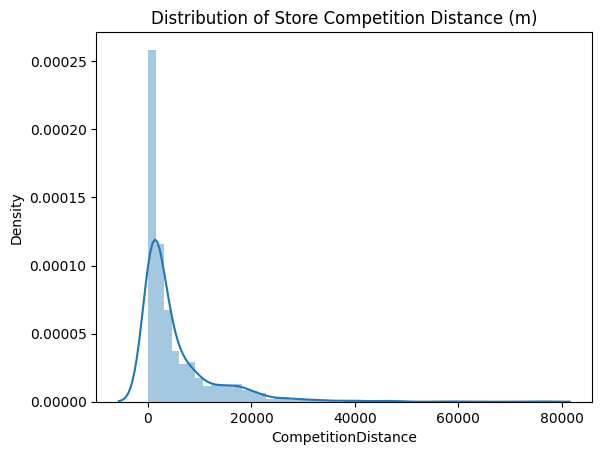

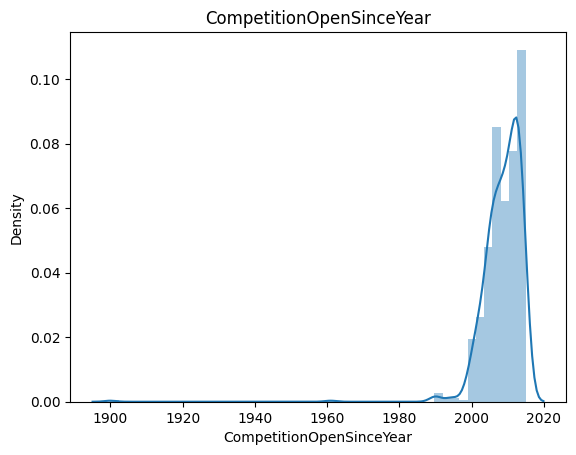

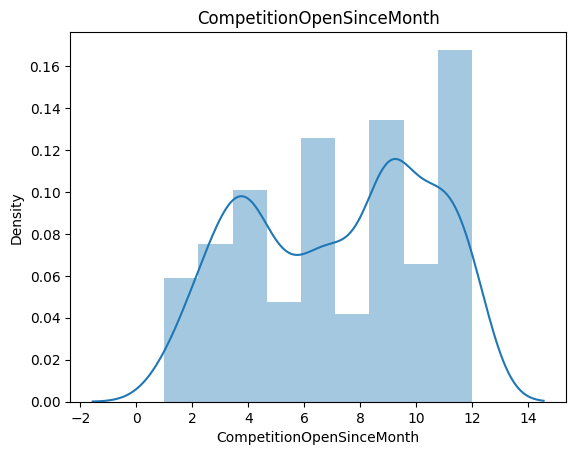

In [ ]:
# Distribution of CompetitionDistance
sns.distplot(store.CompetitionDistance)
plt.title('Distribution of Store Competition Distance (m)')
plt.show()

# # Distribution of CompetitionOpenSinceYear

plt.title('CompetitionOpenSinceYear')
sns.distplot(store.CompetitionOpenSinceYear)
plt.show()

# Distribution of CompetitionOpenSinceMonth

plt.title('CompetitionOpenSinceMonth')
sns.distplot(store.CompetitionOpenSinceMonth)
plt.show()

Dristribution of CompetitionDistance is right skewed so we'll replace the missing values with the median.

In [ ]:
# Replacing missing values with median value
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median() ,inplace = True)

Since the columns 'CompetitionOpenSinceMonth' and 'CompetitionOpenSinceYear' both are categorical columns(Months and Years) so we will replace the missing values with mode of particular column and we can see in the code cell below that both columns have only 1 mode.

In [ ]:
# Checking for modes
print(store['CompetitionOpenSinceMonth'].mode())
print(store['CompetitionOpenSinceYear'].mode())

0    9.0
Name: CompetitionOpenSinceMonth, dtype: float64
0    2013.0
Name: CompetitionOpenSinceYear, dtype: float64


In [ ]:
# Replacing null values with mode
store['CompetitionOpenSinceMonth'].fillna(store['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
store['CompetitionOpenSinceYear'].fillna(store['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [ ]:
# Head
store.head(10).T

,0,1,2,3,4,5,6,7,8,9
Store,1,2,3,4,5,6,7,8,9,10
StoreType,c,a,a,c,a,a,a,a,a,a
Assortment,a,a,a,c,a,a,c,a,c,a
CompetitionDistance,1270.0,570.0,14130.0,620.0,29910.0,310.0,24000.0,7520.0,2030.0,3160.0
CompetitionOpenSinceMonth,9.0,11.0,12.0,9.0,4.0,12.0,4.0,10.0,8.0,9.0
CompetitionOpenSinceYear,2008.0,2007.0,2006.0,2009.0,2015.0,2013.0,2013.0,2014.0,2000.0,2009.0
Promo2,0,1,1,0,0,0,0,0,0,0
Promo2SinceWeek,NaN,13.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Promo2SinceYear,NaN,2010.0,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PromoInterval,NaN,"Jan,Apr,Jul,Oct","Jan,Apr,Jul,Oct",NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can observe that 'Promo2SinceWeek', 'Promo2SinceYear' and 'PromoInterval' are NaN where Promo2 is zero and they have nearly 50% missing value so we will drop these columns.

In [ ]:
store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
#dropping columns from store dataset
store.drop('Promo2SinceWeek',axis=1,inplace=True)
store.drop('Promo2SinceYear',axis=1,inplace=True)
store.drop('PromoInterval',axis=1,inplace=True)

In [ ]:
store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2'],
      dtype='object')

In [ ]:
# Null values sum (store)
store.isna().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,0
CompetitionOpenSinceMonth,0
CompetitionOpenSinceYear,0
Promo2,0


In [ ]:
# Null values sum (ross_data)
ross_data.isna().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0


In [ ]:
ross_data= ross_data[ross_data['Sales'].notna() & ross_data['Customers'].notna()]
ross_data[['Open','Promo','SchoolHoliday']] = ross_data[['Open','Promo','SchoolHoliday']].fillna(0)
ross_data['StateHoliday'] = ross_data['StateHoliday'].fillna('0')

In [ ]:
ross_data.isna().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0


**Value counts in following columns**

In [ ]:
# Values Counts
print('DayOfWeek:\n', ross_data['DayOfWeek'].value_counts(), '\n\n' )
print('Open:\n', ross_data['Open'].value_counts(), '\n\n' )

DayOfWeek:
 DayOfWeek
5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: count, dtype: int64 


Open:
 Open
1    844392
0    172817
Name: count, dtype: int64 




In [ ]:
# Value count cont.
print('Promo:\n', ross_data['Promo'].value_counts(), '\n\n' )
print('StateHoliday:\n', ross_data['StateHoliday'].value_counts(), '\n\n')
print('SchoolHoliday:\n', ross_data['SchoolHoliday'].value_counts())

Promo:
 Promo
0    629129
1    388080
Name: count, dtype: int64 


StateHoliday:
 StateHoliday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: count, dtype: int64 


SchoolHoliday:
 SchoolHoliday
0    835488
1    181721
Name: count, dtype: int64


In [ ]:
#Checking unique value
ross_data['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In 'StateHoliday' 0 is repeated so, we will fix this using lambda function.

**Barplot of StateHoliday vs Sales and StateHoliday vs Customers to check significance of different values.**

KeyboardInterrupt: 

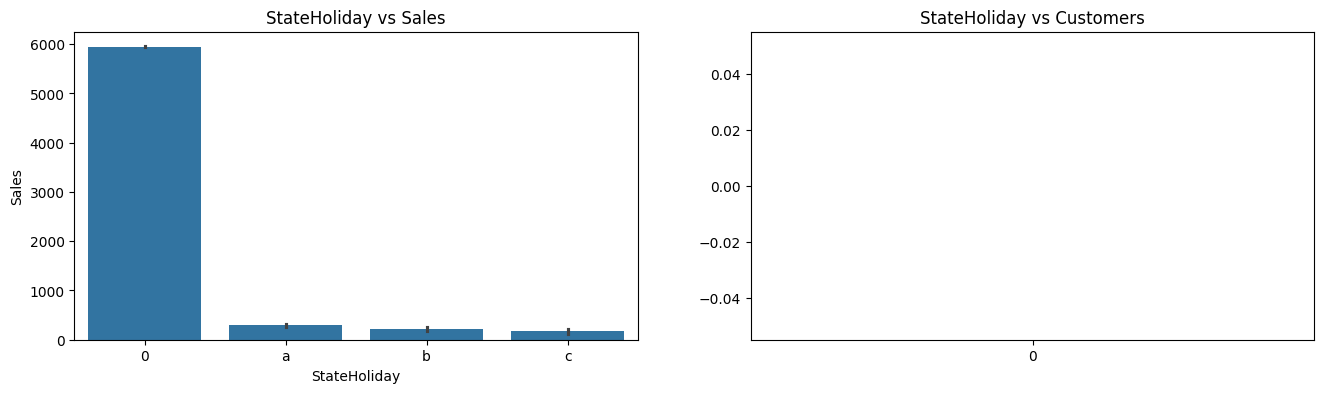

In [ ]:
fig, (state1, state2) = plt.subplots(1,2,figsize= (16,4))

# Barplot of StateHoliday vs Sales
state1.title.set_text('StateHoliday vs Sales')
sns.barplot(x = 'StateHoliday', y = 'Sales', data = ross_data, ax = state1)

# Barplot of StateHoliday vs Customers
state2.title.set_text('StateHoliday vs Customers')
sns.barplot(x = 'StateHoliday', y = 'Customers', data = ross_data, ax = state2)

There is no significant difference in the value of sales of state holiday type a, b and c as compared to '0'. So, we can treat different types of stateholidays in same way. Thus we can replace state holiday type a, b & c by 1 only.

In [ ]:
# Replacing 'a', 'b' and 'c' with 1
ross_data.StateHoliday.replace({'a': 1,
                                'b' : 1,
                                'c' : 1
                                }, inplace = True )

In [ ]:
# Verifying
ross_data['StateHoliday'].value_counts()

In [ ]:
# Extracting of data from 'Date' column
ross_data['Year'] = pd.to_datetime(ross_data['Date'], format='%Y-%m-%d').dt.year
ross_data['Month'] = pd.to_datetime(ross_data['Date'], format='%Y-%m-%d').dt.month
ross_data['Day'] = pd.to_datetime(ross_data['Date'], format='%Y-%m-%d').dt.day
ross_data['DayOfWeek'] = pd.to_datetime(ross_data['Date'], format='%Y-%m-%d').dt.isocalendar().week

**Distribution of 'Sales'**

In [ ]:
# distribution plot
sns.distplot(ross_data['Sales'])

**Sales per store type**

In [ ]:
# Barplot
sns.barplot(x = store['StoreType'], y = ross_data['Sales'])
plt.title('Sales per store type')

**Sales vs Assortment**

Text(0.5, 1.0, 'Sales vs Assortment')

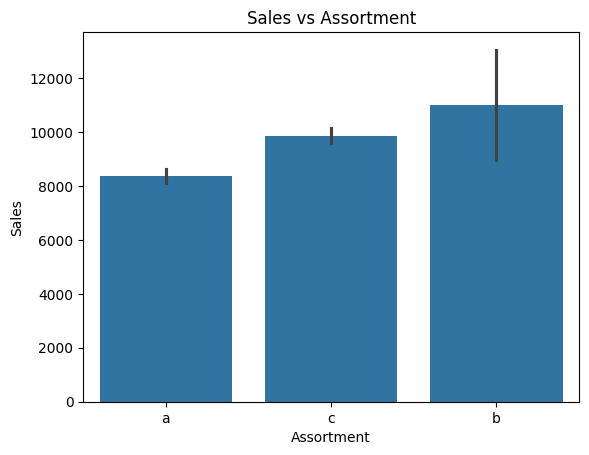

In [ ]:
# Barplot
sns.barplot(x = store['Assortment'], y = ross_data['Sales'])
plt.title('Sales vs Assortment')

**Effect of promotion in sales and number of customers.**

<Axes: title={'center': 'Promo vs Customers'}, xlabel='Promo', ylabel='Customers'>

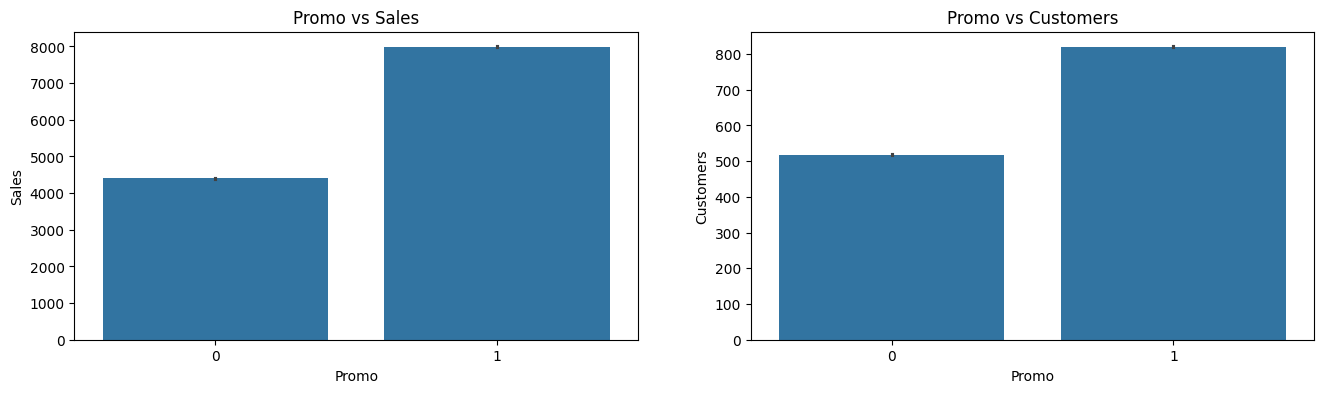

In [ ]:
# Barplot
fig, (fig1, fig2) = plt.subplots(1,2,figsize= (16,4))

# Barplot of Promo vs Sales
fig1.title.set_text('Promo vs Sales')
sns.barplot(x = 'Promo', y = 'Sales', data = ross_data, ax = fig1)

# Barplot of Promo vs Customers
fig2.title.set_text('Promo vs Customers')
sns.barplot(x = 'Promo', y = 'Customers', data = ross_data, ax = fig2)

Here we can observe that Sales and number of customers increase significantly during promo periods. This shows that promotion have a positive effect of stores

**Sales vs holidays & Holidays vs Customers**

<Axes: title={'center': 'StateHolidays vs Customers'}, xlabel='StateHoliday', ylabel='Customers'>

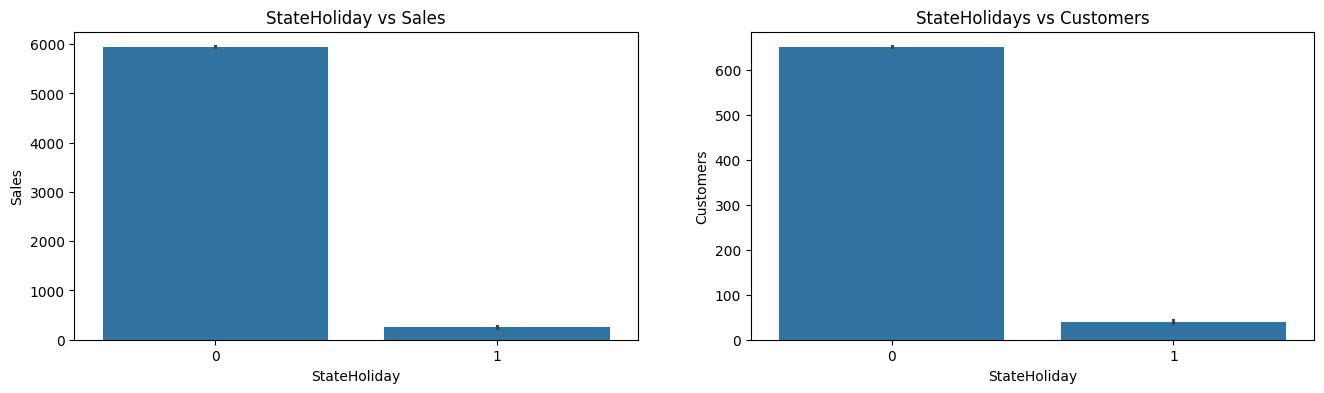

In [ ]:
# Barplot
fig, (fig3, fig4) = plt.subplots(1,2,figsize= (16,4))

# StateHoliday vs Sales
fig3.title.set_text('StateHoliday vs Sales')
sns.barplot(x = 'StateHoliday', y = 'Sales', data = ross_data, ax = fig3)

# StateHoliday vs Customers
fig4.title.set_text('StateHolidays vs Customers')
sns.barplot(x = 'StateHoliday', y = 'Customers', data = ross_data, ax = fig4)

Only a few stores are open and a few customers purchase on state holidays.

**Sales and number of customers on School Holidays**

<Axes: title={'center': 'SchoolHoliday vs Customers'}, xlabel='SchoolHoliday', ylabel='Customers'>

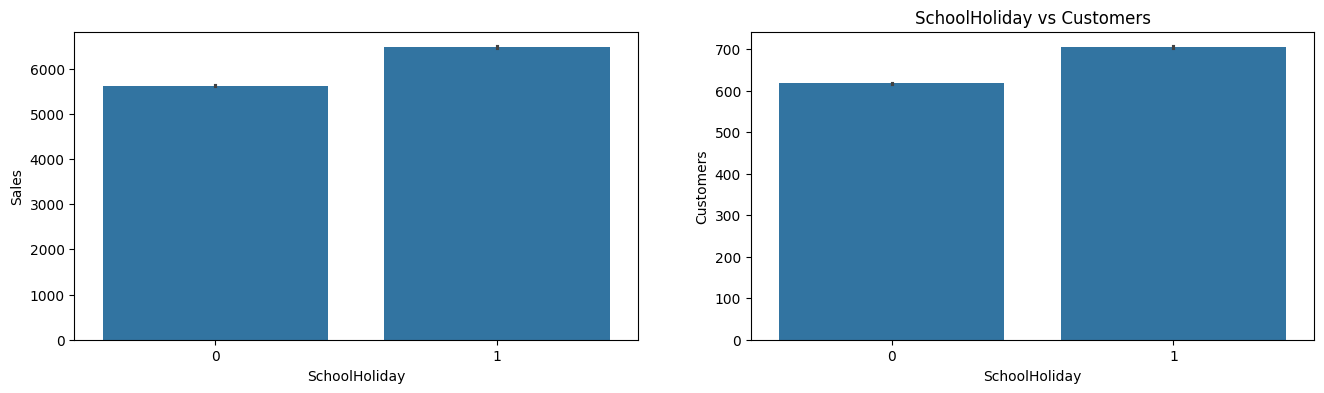

In [40]:
# Barplot
fig, (fig_1, fig_2) = plt.subplots(1,2,figsize= (16,4))

# SchoolHoliday vs Sales
fig_2.title.set_text('SchoolHoliday vs Sales')
sns.barplot(x = 'SchoolHoliday', y = 'Sales', data = ross_data, ax = fig_1)

# Schoolholiday vs number of customers
fig_2.title.set_text('SchoolHoliday vs Customers')
sns.barplot(x = 'SchoolHoliday', y = 'Customers', data = ross_data, ax = fig_2)


We can observe that there is slight increase in sales and number of customers visiting on school holidays.

In [41]:
ross_data["DayOfWeek"].unique()

<IntegerArray>
[31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13,
 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1, 52, 51, 50, 49, 48, 47, 46,
 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32]
Length: 52, dtype: UInt32

In [42]:
ross_data['Date'] = pd.to_datetime(ross_data['Date'])

ross_data['DayOfWeek'] = ross_data['Date'].dt.dayofweek + 1

In [43]:
ross_data["DayOfWeek"].unique()

array([5, 4, 3, 2, 1, 7, 6])

Open stores per day of week

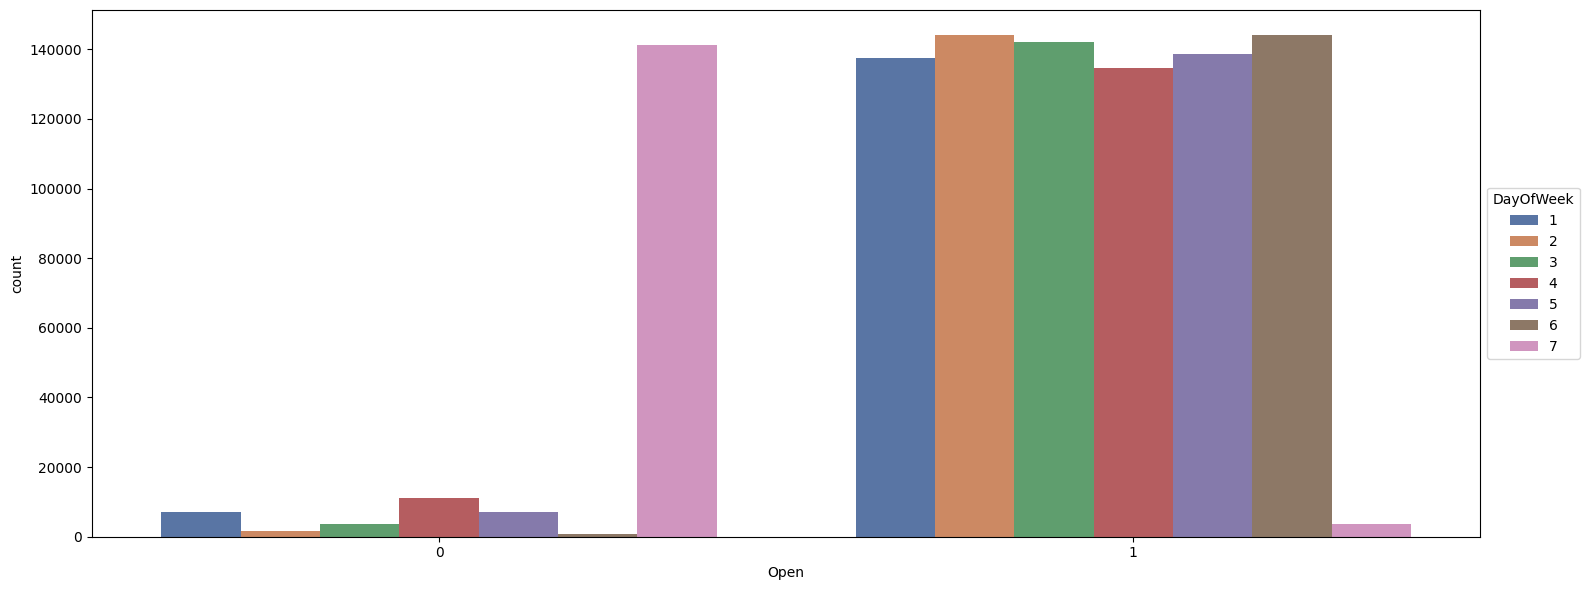

In [44]:

# Opened and closed stores in a week
fig6, ax= plt.subplots(1,1, figsize = (16,6))
sns.countplot(x = 'Open', hue = 'DayOfWeek', data = ross_data, palette= 'deep',ax=ax)

ax.legend(
    title='DayOfWeek',
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)

plt.tight_layout()
plt.show()


Mostly the store will be closed on Day 7.

**Trend of Average Sales per day of week**

Text(0.5, 1.0, 'Average sales by day of the week')

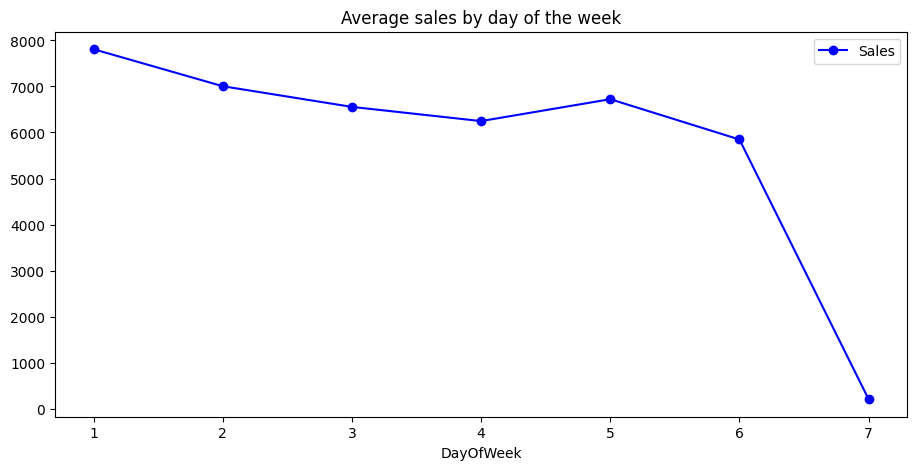

In [45]:
# Average salesplot
fig_a = ross_data.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (11,5), marker = 'o', color = 'b')
fig_a.set_title('Average sales by day of the week')

**Sales per year**

<Axes: title={'center': 'Sales'}, xlabel='Year'>

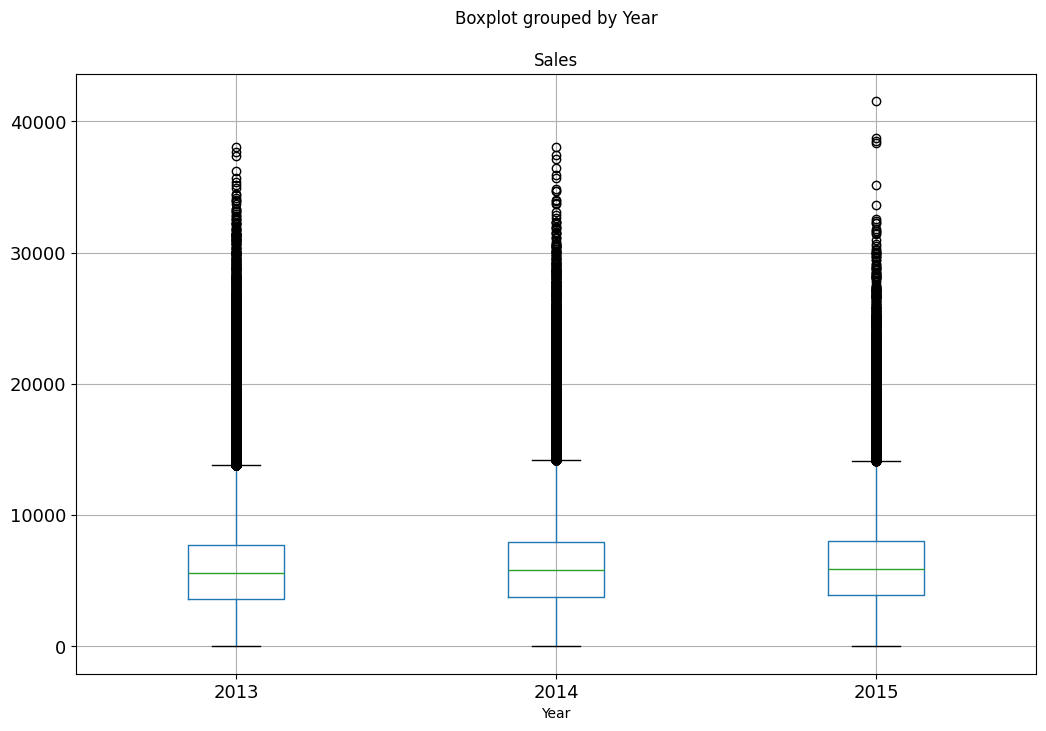

In [46]:
# Box plot
ross_data.boxplot('Sales', 'Year', figsize= (12,8), fontsize=13 )

**Sales per month**

<Axes: title={'center': 'Sales'}, xlabel='Month'>

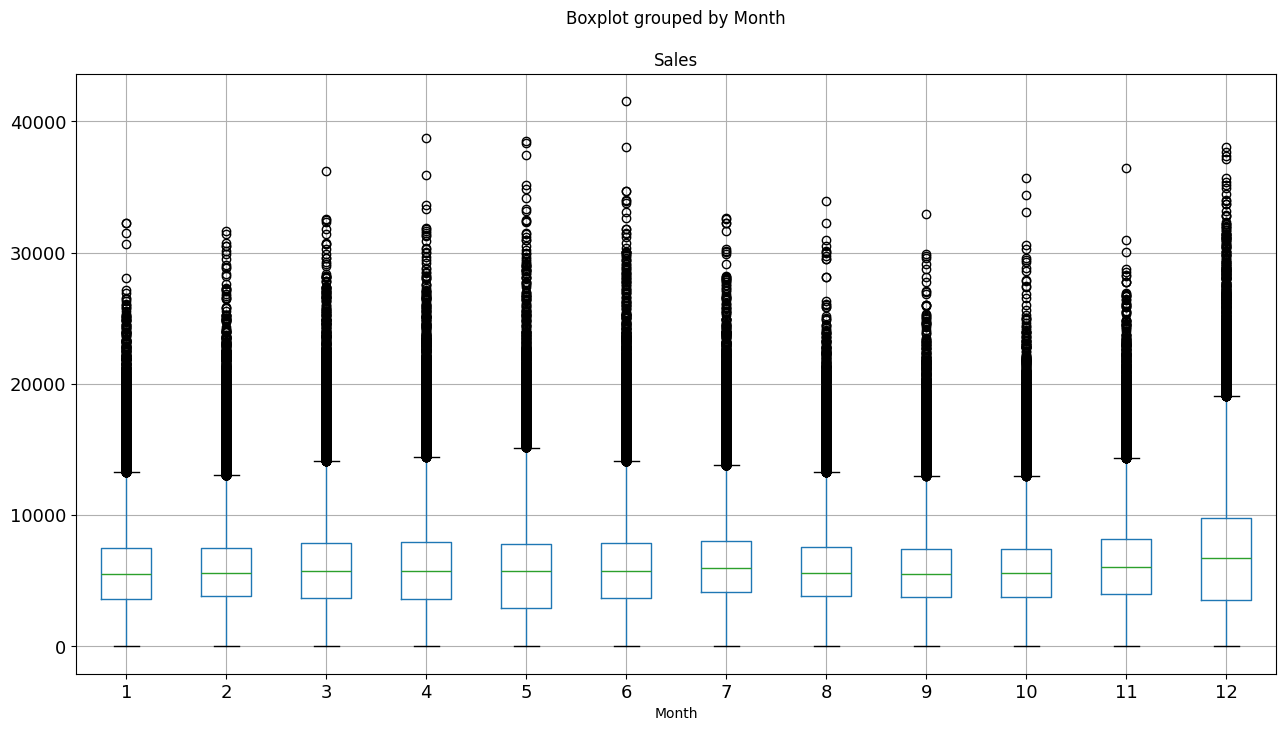

In [47]:
# Boxplot
ross_data.boxplot('Sales', 'Month', figsize= (15,8), fontsize=13 )


**Trend of Sales per month**

Text(0.5, 1.0, 'Average Sales per Month')

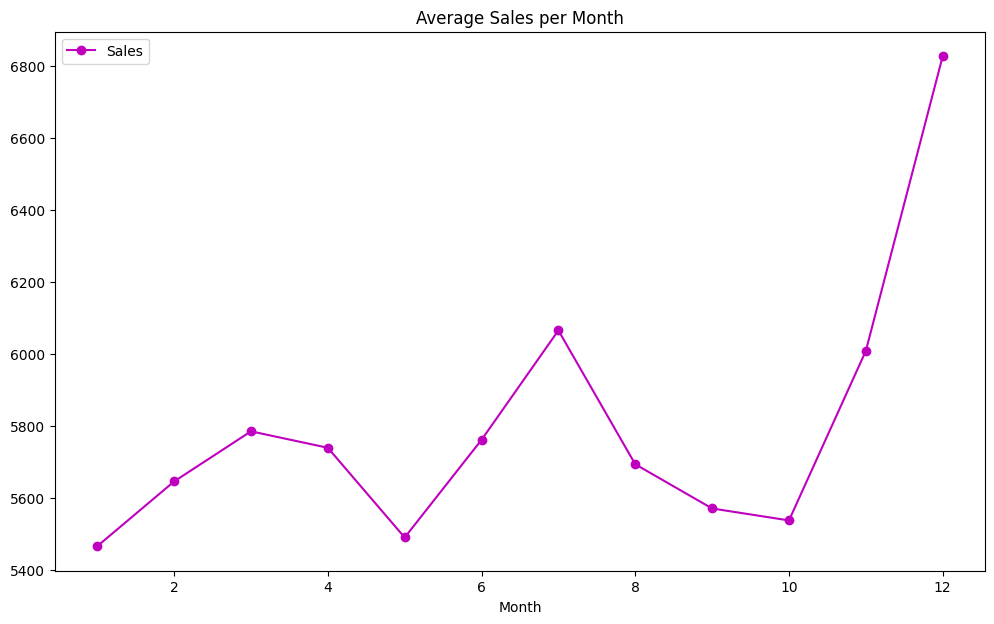

In [48]:
# Avg sales per month
fig_c = ross_data.groupby('Month')[['Sales']].mean().plot(figsize = (12,7), marker = 'o', color = 'm')
fig_c.set_title('Average Sales per Month')

We can observe the significant increase in sales in the month of december. This may be because of Christmas Holidays.

**Trend of Average sales per day of Month**

Text(0.5, 1.0, 'Average Sales per Day')

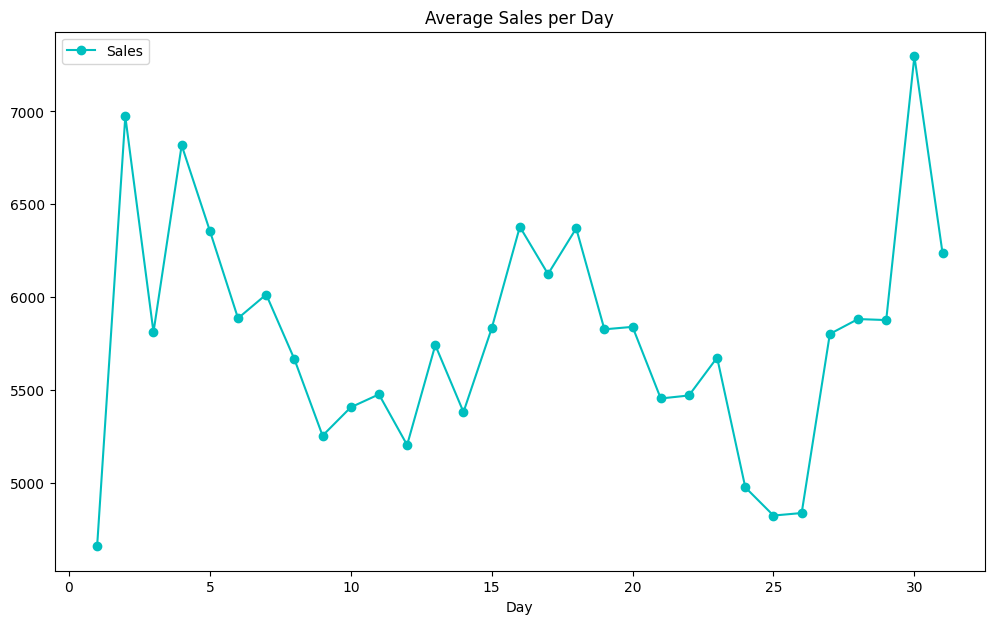

In [49]:
# Avg sales per day (Monthly)
fig_e = ross_data.groupby('Day')[['Sales']].mean().plot(figsize = (12,7), marker = 'o', color = 'c')
fig_e.set_title('Average Sales per Day')


**EDA findings:**

The best-selling and most frequently visited by customers is store of type B.

For all stores, promotion leads to increased sales and customers.

Sales are strongly correlated to the number of customers.

Stores open during school holidays have more sales than on normal days.

More stores are open during school holidays than on public holidays.

Sales increase during Christmas week, this may be due to people buying gifts during a Christmas holidays.

# Feature Engineering

In [50]:
# Dropping '0' in 'Open' as it indicates that store was closed
openstore_df = ross_data[ross_data['Open'] != 0]

In [51]:
# we can now drop the column 'Open' as we only included data with 'Open' = 1
openstore_df.drop('Open', axis = 1, inplace = True)
# Making a Copy
ross_df = openstore_df.copy()

In [52]:
# head
ross_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,2015,7,31
1,2,5,2015-07-31,6064,625,1,0,1,2015,7,31
2,3,5,2015-07-31,8314,821,1,0,1,2015,7,31
3,4,5,2015-07-31,13995,1498,1,0,1,2015,7,31
4,5,5,2015-07-31,4822,559,1,0,1,2015,7,31


<Axes: xlabel='Sales', ylabel='Density'>

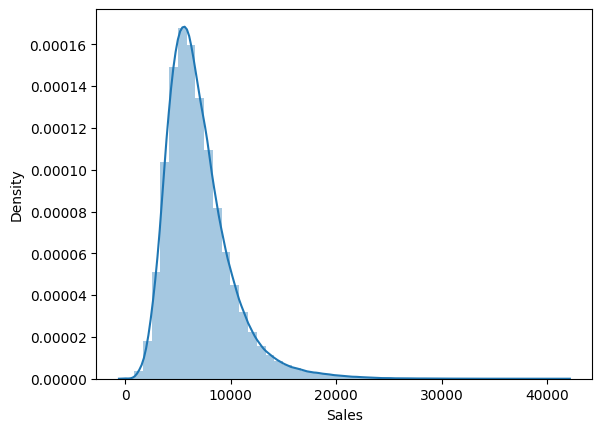

In [53]:
# Distribution of sales after we drop the closed store.
sns.distplot(ross_df['Sales'])

We can see that the spike that was present there is now gone.

In [54]:
# Checking for infinite values
np.isinf(ross_df['Sales']).sum()

np.int64(0)

In [55]:
# info
ross_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 844392 entries, 0 to 1017190
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Store          844392 non-null  int64         
 1   DayOfWeek      844392 non-null  int64         
 2   Date           844392 non-null  datetime64[ns]
 3   Sales          844392 non-null  int64         
 4   Customers      844392 non-null  int64         
 5   Promo          844392 non-null  int64         
 6   StateHoliday   844392 non-null  object        
 7   SchoolHoliday  844392 non-null  int64         
 8   Year           844392 non-null  int32         
 9   Month          844392 non-null  int32         
 10  Day            844392 non-null  int32         
dtypes: datetime64[ns](1), int32(3), int64(6), object(1)
memory usage: 67.6+ MB


In [56]:
# Creating a list of all relevant numerical features for linear regg.
num_features = list(ross_df.describe().columns)

#num_features.remove('Store')
num_features.remove('Sales')

num_features

['Store',
 'DayOfWeek',
 'Date',
 'Customers',
 'Promo',
 'SchoolHoliday',
 'Year',
 'Month',
 'Day']

**Relationship between numerical features and target variable.**

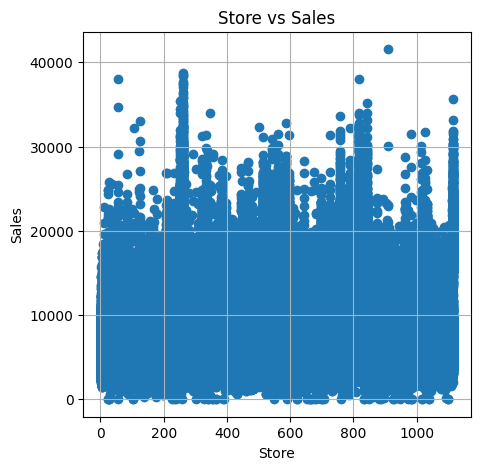

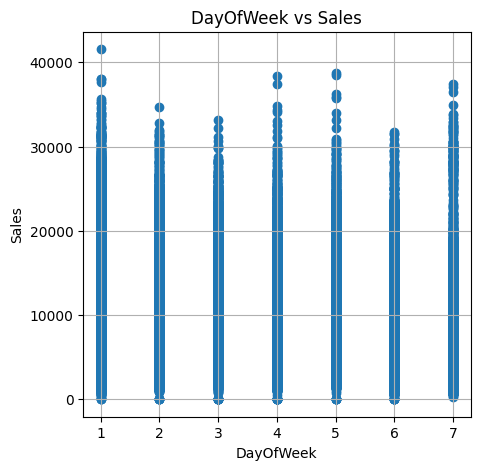

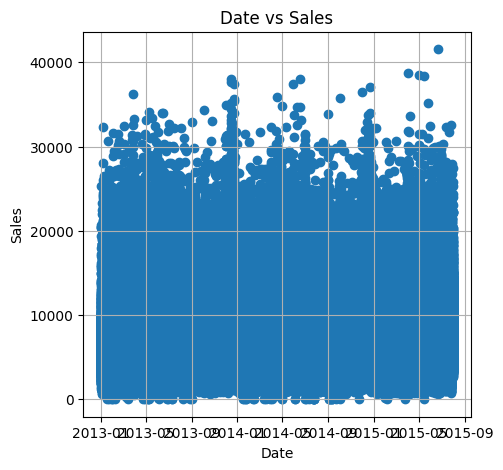

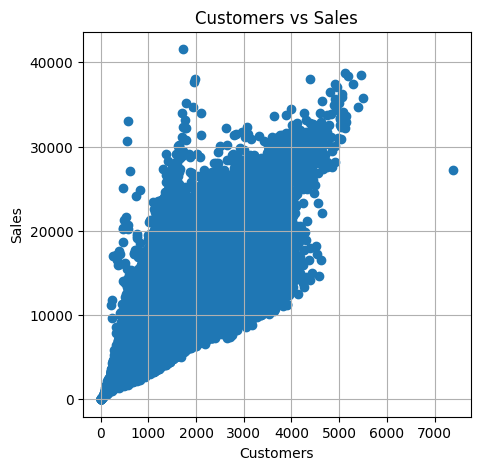

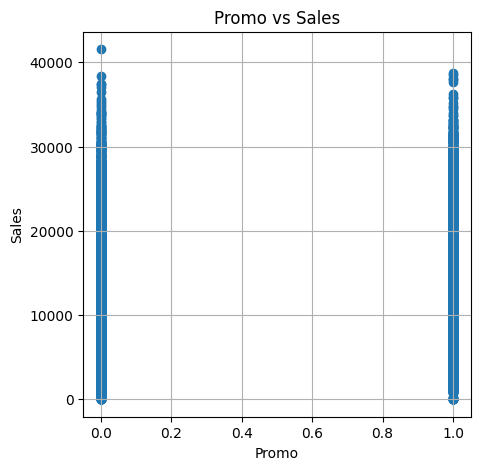

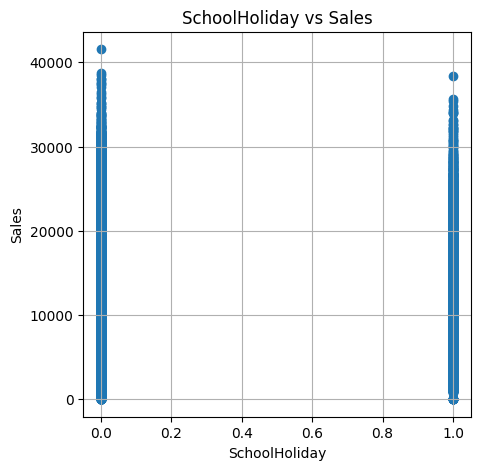

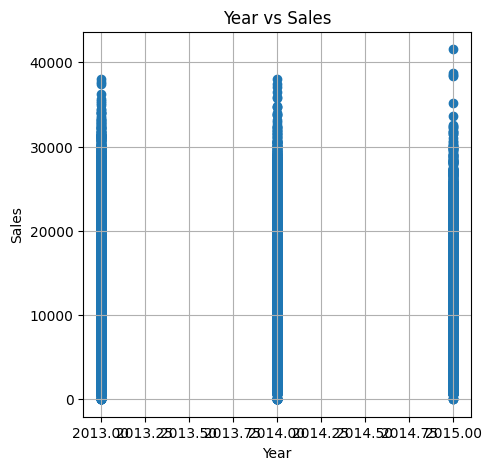

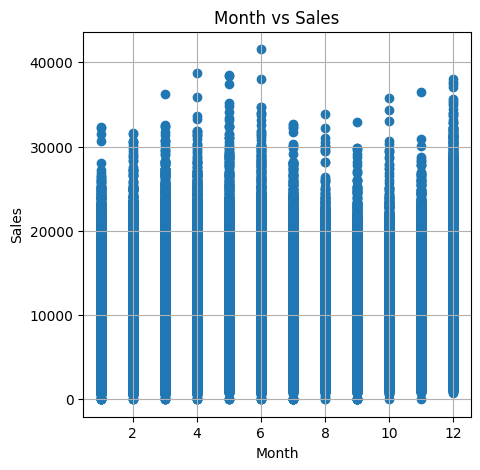

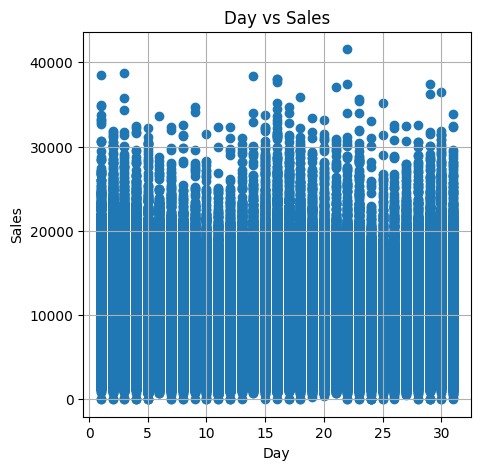

In [57]:
# Plotting the relationship between each numerical feature and the target (Sales)

for i in num_features:
    plt.figure(figsize=(5, 5))
    plt.scatter(ross_df[i], ross_df['Sales'])
    plt.xlabel(i)
    plt.ylabel('Sales')
    plt.title(f'{i} vs Sales')
    plt.grid(True)
    plt.show()

In [ ]:
ross_data.Year.unique()

array([2015, 2014, 2013], dtype=int32)

In [ ]:
ross_data.drop(["Year"], axis=1, inplace=True)

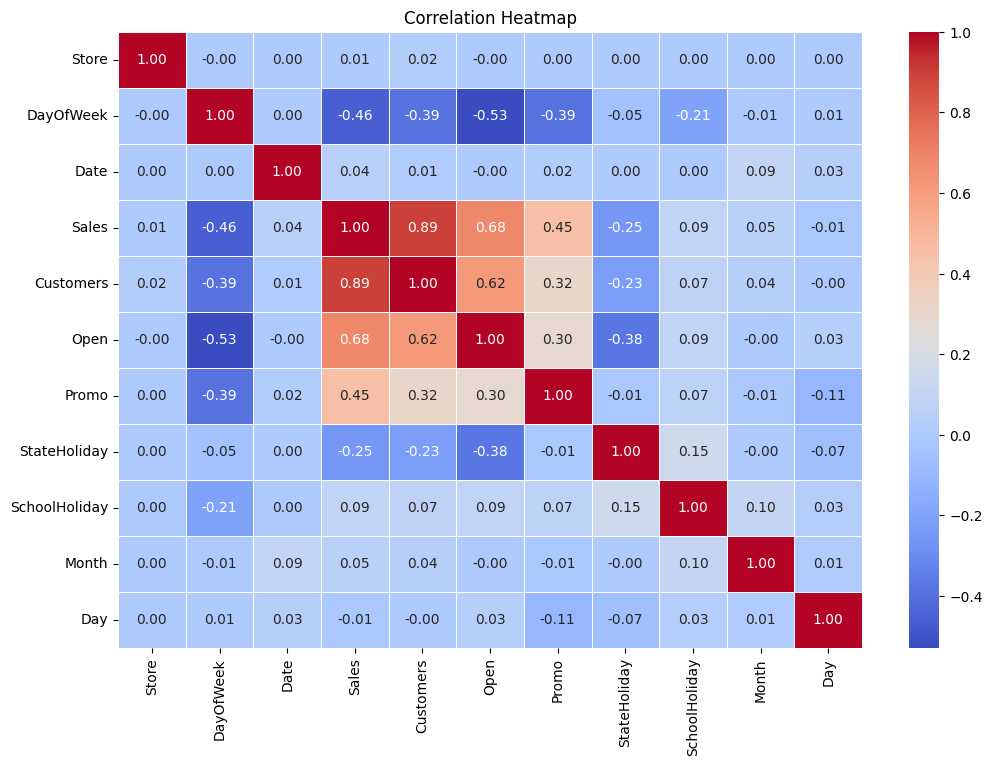

In [ ]:

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create the heatmap
corr_matrix = ross_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)

# Show the plot
plt.title('Correlation Heatmap')
plt.show()


Merging both datasets

In [61]:
# Merging using left join
joined_data = pd.merge(ross_df, store, how= 'left')
joined_data.to_csv("joined_data.csv", index=False)